In [1]:
import cv2
import numpy as np
from random import randint
from scipy.linalg import norm
import numpy as np
from math import atan

In [13]:
a = np.array([[5,3,5],[2,1,2]])
b = a *2
a, b

(array([[5, 3, 5],
        [2, 1, 2]]), array([[10,  6, 10],
        [ 4,  2,  4]]))

In [19]:
r,s,t, d = opa(a,b) # gets b to a coordinates

1.7554167342883506e-16

In [20]:
bs= b.dot(r) * s + t
bs

array([[5., 3., 5.],
       [2., 1., 2.]])

In [2]:



        
def opa(a, b):# a, b matrices de puntos [[],[],[]] a and b need to have same dimension
    aT = a.mean(0) # column mean [[1,2,3],[1,2,3]]<-(1,2,3)
    bT = b.mean(0)
    A = a - aT  #We rest aT and bT to center the matrix (translation)
    B = b - bT
    aS = np.sum(A * A)**.5 #to see the scale, we first calculate square of squared sum
    bS = np.sum(B * B)**.5
    A /= aS  #we standarize the scale.
    B /= bS
    U, _, V = np.linalg.svd(np.dot(B.T, A)) # we get the principal values of the mult for getting the rotation more close 
    aR = np.dot(U, V) #<-the rotation matrix is the multiplication of these 2
    if np.linalg.det(aR) < 0: # we rotate to the positive side
        V[1] *= -1
        aR = np.dot(U, V)
    aS = aS / bS  #to scale A most similar to B, we divide the scale by sSvale
    aT-= (bT.dot(aR) * aS) #to get the translation in B coordinates, rest b mean rotated to A, and scaled to A 
    aD = (np.sum((A - B.dot(aR))**2) / len(a))**.5  # the square distance (error)of the A and B rotated after scale and translation
    return aR, aS, aT, aD #return aROtation, aScale, aTranslation, Adifference
        
def gpa(v, n=-1): #v is vector of images, n indicates index to reflect
    if n < 0: 
        p = avg(v)
    else:
        p = v[n]
    l = len(v) #quantity of images
    r, s, t, d = np.ndarray((4, l), object) #4 array of len l, each a matrix
    for i in range(l):
        r[i], s[i], t[i], d[i] = opa(p, v[i]) 
    return r, s, t, d#<-calculates the matrix and the error for all images, you use the one with the smallest one (can iterate this)

def avg(v): #given a vector of images, calculates average shape of images 
    v_= np.copy(v)
    l = len(v_) 
    R, S, T = [list(np.zeros(l)) for _ in range(3)]
    for i, j in np.ndindex(l, l): #hace la daptacion de cada i para cada j
        r, s, t, _ = opa(v_[i], v_[j]) 
        R[j] += np.arccos(min(1, max(-1, np.trace(r[:1])))) * np.sign(r[1][0]) 
        S[j] += s 
        T[j] += t #ajusta rot, s y translacion en todo j con todo i
    for i in range(l):#hace el avg dado todo j
        a = R[i] / l
        r = [np.cos(a), -np.sin(a)], [np.sin(a), np.cos(a)]
        v_[i] = v_[i].dot(r) * (S[i] / l) + (T[i] / l) 
    return v_.mean(0)

In [5]:
l= 4
[list(np.zeros(l)) for _ in range(3)]

[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]]

In [7]:
for i, j in np.ndindex(l, l):
    print(i, j)

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3


[[1, 2, 5]]

In [13]:
a[:1]

[[2, 3, 4]]

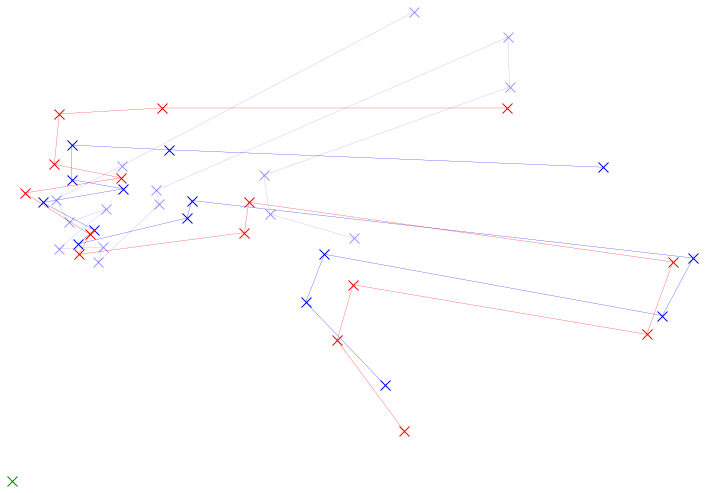

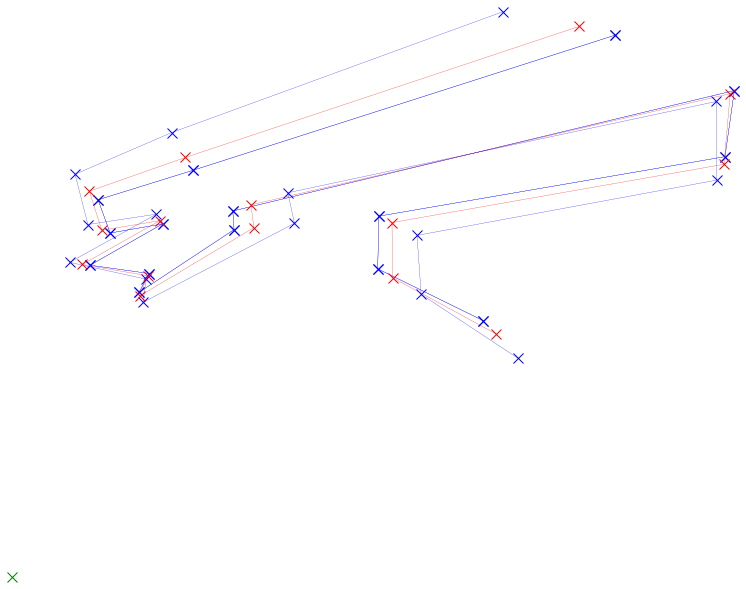

In [4]:
import matplotlib.pyplot as p; p.rcParams['toolbar'] = 'None';

def plt(o, e, b):
    p.figure(figsize=(10, 10), dpi=72, facecolor='w').add_axes([0.05, 0.05, 0.9, 0.9], aspect='equal')
    p.plot(0, 0, marker='x', mew=1, ms=10, c='g', zorder=2, clip_on=False)
    p.gcf().canvas.set_window_title('%f' % e)
    x = np.ravel(o[0].T[0])
    y = np.ravel(o[0].T[1])
    p.xlim(min(x), max(x)) 
    p.ylim(min(y), max(y))
    a = []
    for i, j in np.ndindex(len(o), 2):
        a.append(o[i].T[j])    
    O = p.plot(*a, marker='x', mew=1, ms=10, lw=.25, c='b', zorder=0, clip_on=False)
    O[0].set(c='r', zorder=1)
    if not b:
        O[2].set_color('b')
        O[2].set_alpha(0.4)
    p.axis('off')     
    p.show()

# Fly wings example (Klingenberg, 2015 | https://en.wikipedia.org/wiki/Procrustes_analysis)
arr1 = np.array([[588.0, 443.0], [178.0, 443.0], [56.0, 436.0], [50.0, 376.0], [129.0, 360.0], [15.0, 342.0], [92.0, 293.0], [79.0, 269.0], [276.0, 295.0], [281.0, 331.0], [785.0, 260.0], [754.0, 174.0], [405.0, 233.0], [386.0, 167.0], [466.0, 59.0]])
arr2 = np.array([[477.0, 557.0], [130.129, 374.307], [52.0, 334.0], [67.662, 306.953], [111.916, 323.0], [55.119, 275.854], [107.935, 277.723], [101.899, 259.73], [175.0, 329.0], [171.0, 345.0], [589.0, 527.0], [591.0, 468.0], [299.0, 363.0], [306.0, 317.0], [406.0, 288.0]])
arr3 = np.array([[477.0, 557.0], [130.129, 374.307], [52.0, 334.0], [67.662, 306.953], [111.916, 323.0], [55.119, 275.854], [107.935, 277.723], [101.899, 259.73], [175.0, 329.0], [171.0, 345.0], [589.0, 527.0], [591.0, 468.0], [299.0, 363.0], [306.0, 317.0], [406.0, 288.0]])
arr3 = arr3 *4
def opa_out(a):
    r, s, t, d = opa(a[0], a[1])
    a[1] = a[1].dot(r) * s + t
    return a, d, False

plt(*opa_out([arr1, arr2, np.matrix.copy(arr2)]))
a=1
def gpa_out(a):
    g = gpa(a, -1) 
    D = [avg(a)]
    for i in range(len(a)):
        D.append(a[i].dot(g[0][i]) * g[1][i] + g[2][i])
    return D, sum(g[3])/len(a), True 
plt(*gpa_out([arr1, arr2, arr3]))

In [6]:
def opa_out([arr1, arr2])

SyntaxError: invalid syntax (<ipython-input-6-d0fef00ffd63>, line 1)